### Data preprocessing

In [1]:
import mne
import numpy as np
print(mne.__version__)
print(np.__version__)
import sys
sys.path.append('../src/utils/data_preprocessing')
sys.path.append('../src/model')
sys.path.append('../src/data')

import temp_utils as utils
import gc


1.6.0
1.26.3


In [ ]:
file_index = 1
file_path = rf'../src/data/EEG_DATASET/{file_index}/{file_index}.edf'
raw = utils.obtain_processed_raw(file_path)

In [ ]:
picks = utils.obtain_picks(raw)
info = utils.obtain_eeg_info(raw, picks)

i = 0
sample_rate = raw.info['sfreq']
start_time = int(i * sample_rate)  # 将秒转换为样本数
end_time = int((i + 1) * sample_rate)  # 将秒转换为样本数

data, times = raw.get_data(picks=picks, start=start_time, stop=end_time, return_times=True)

In [28]:
import pandas as pd

file_index = 1
edf_file_path = rf'../src/data/EEG_DATASET/{file_index}/{file_index}.edf'
label_file_path = rf'../src/data/EEG_DATASET/{file_index}/{file_index}.xlsx'

with pd.ExcelFile(label_file_path) as xls:
    label_df = pd.read_excel(xls, 'Sheet1', header=None)
    label_df.rename(columns={0: 'label'}, inplace=True)

# 计算label为0的行的个数，然后选取所有的label为0的行
label_0_count = label_df[label_df['label'] == 0].shape[0]

# 分别选取所有为0的行 以及 label_0_count个为1的行 分别储存他们的行号
label_0_index = label_df[label_df['label'] == 0].index
label_1_index = label_df[label_df['label'] == 1].index[:label_0_count]

# 从eeg信号中选取对于时间点的数据

raw = utils.obtain_processed_raw(edf_file_path)
picks = utils.obtain_picks(raw)
info = utils.obtain_eeg_info(raw, picks)

time_length = 3600 # 3600 seconds
sample_rate = raw.info['sfreq']

energy_list = np.zeros((2,label_0_count, 16))


for i, index in enumerate(label_0_index):
    start_time, end_time = int(index * sample_rate), int((index + 1) * sample_rate)
    data, times = raw.get_data(picks=picks, start=start_time, stop=end_time, return_times=True)
    energy = np.sum(data**2, axis=1)
    energy_list[0][i] = energy

for i, index in enumerate(label_1_index):
    start_time, end_time = int(index * sample_rate), int((index + 1) * sample_rate)
    data, times = raw.get_data(picks=picks, start=start_time, stop=end_time, return_times=True)
    energy = np.sum(data**2, axis=1)
    energy_list[1][i] = energy

print(energy_list.shape)


(2, 398, 16)


In [2]:
y_max = [0.00005, 0.0001, 0.00005, 0.00005, 0.00002, 0.00002, 0.00001, 0.00001, 0.00001, 0.00002, 0.00002, 0.00002, 0.00001, 0.00005, 0.00002]
for i, y in enumerate(y_max):
    utils.compare_seizure_non_seizure(i+1,y)


In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import plotly.io as pio

pio.renderers.default = "browser"

# 创建一个2行1列的子图布局
fig = make_subplots(rows=1, cols=2)

# 第一个子图
for i in range(16):
    fig.add_trace(
        go.Scatter(
            x=np.arange(0, energy_list.shape[1]),  # 时间点数可能需要根据您的数据进行调整
            y=energy_list[0, :, i],
            mode='lines',
            name=raw.info['ch_names'][i]
        ),
        row=1, col=1
    )

# 第二个子图
for i in range(16):
    fig.add_trace(
        go.Scatter(
            x=np.arange(0, energy_list.shape[1]),  # 时间点数可能需要根据您的数据进行调整
            y=energy_list[1, :, i],
            mode='lines',
            name=raw.info['ch_names'][i]
        ),
        row=1, col=2
    )

# 设置y轴的范围为0到0.0001，且按照0.00001的间隔显示，并更新布局
fig.update_layout(
    title=f'Patient No.{edf_file_path}: energy of 16 channels', 
    xaxis_title='time (s)', 
    yaxis_title='energy', 
    xaxis=dict(tickmode='linear', tick0=0, dtick=300),
    xaxis2=dict(tickmode='linear', tick0=0, dtick=300)
)

# 更新每个子图的Y轴设置
fig.update_yaxes(range=[0, 0.0001], dtick=0.00001, row=1, col=1)
fig.update_yaxes(range=[0, 0.0001], dtick=0.00001, row=2, col=1)

# 在浏览器中显示图像
fig.show()


In [7]:
# 绘制33个人的能量图像：

data_box = []
for i in range(1,34):
    file_index = i
    file_path = rf'../src/data/EEG_DATASET/{file_index}/{file_index}.edf'
    data_box.append(utils.visulize_EEG_power(file_path, plotly=True))

    

这是file_path: ../src/data/EEG_DATASET/1/1.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/2/2.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/3/3.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/4/4.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/5/5.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/6/6.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/7/7.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/8/8.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/9/9.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/10/10.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/11/11.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/12/12.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/13/13.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/14/14.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/15/15.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/16/16.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DATASET/17/17.edf的EEG能量时间趋势图
这是file_path: ../src/data/EEG_DAT

这是file_path: ../src/data/EEG_DATASET/1/1.edf的EEG能量时间趋势图


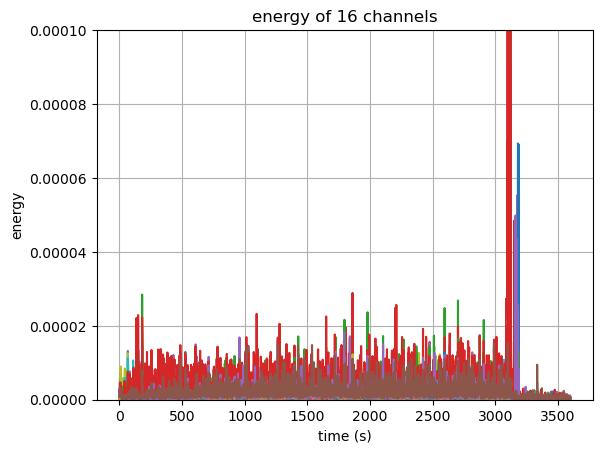

这是file_path: ../src/data/EEG_DATASET/2/2.edf的EEG能量时间趋势图


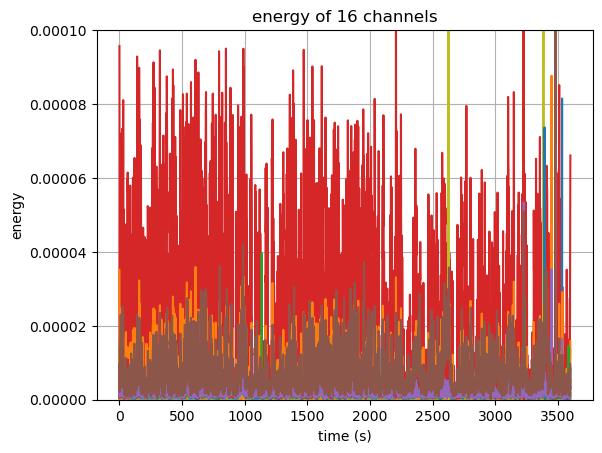

这是file_path: ../src/data/EEG_DATASET/3/3.edf的EEG能量时间趋势图


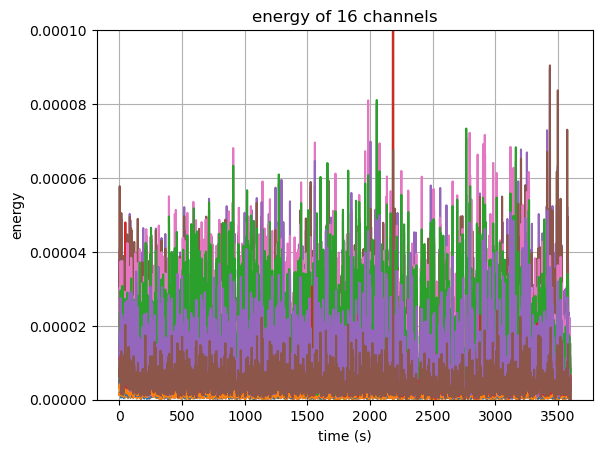

这是file_path: ../src/data/EEG_DATASET/4/4.edf的EEG能量时间趋势图


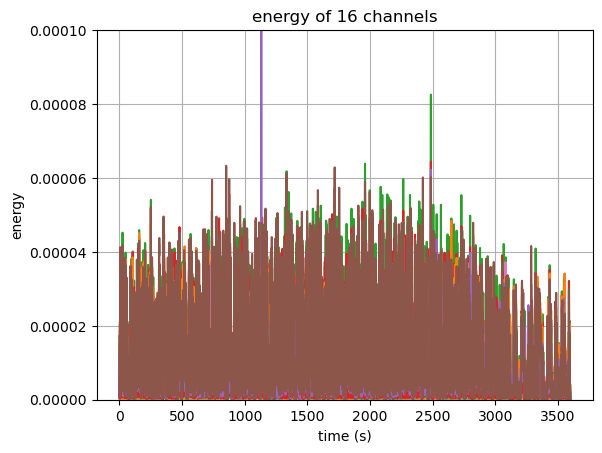

这是file_path: ../src/data/EEG_DATASET/5/5.edf的EEG能量时间趋势图


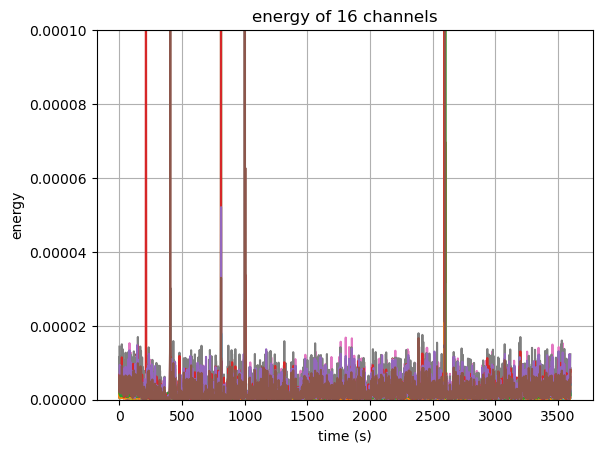

这是file_path: ../src/data/EEG_DATASET/6/6.edf的EEG能量时间趋势图


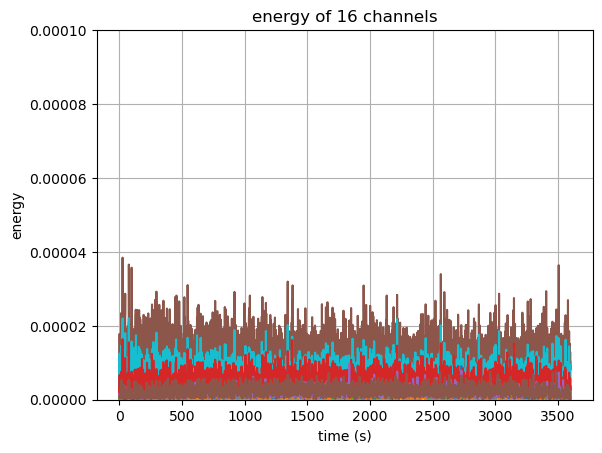

这是file_path: ../src/data/EEG_DATASET/7/7.edf的EEG能量时间趋势图


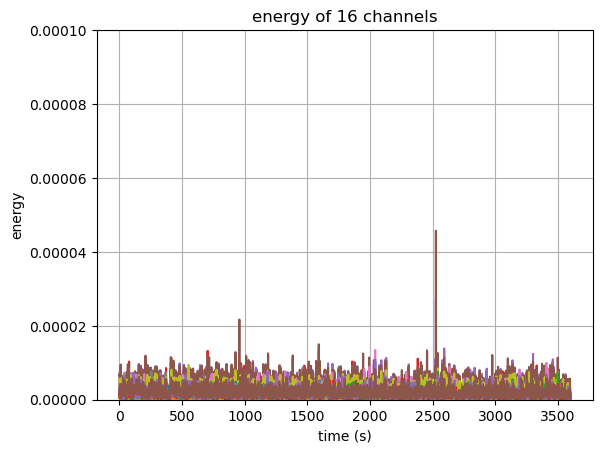

这是file_path: ../src/data/EEG_DATASET/8/8.edf的EEG能量时间趋势图


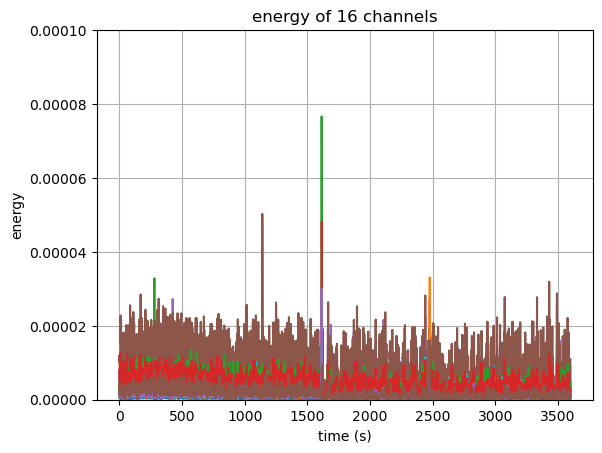

这是file_path: ../src/data/EEG_DATASET/9/9.edf的EEG能量时间趋势图


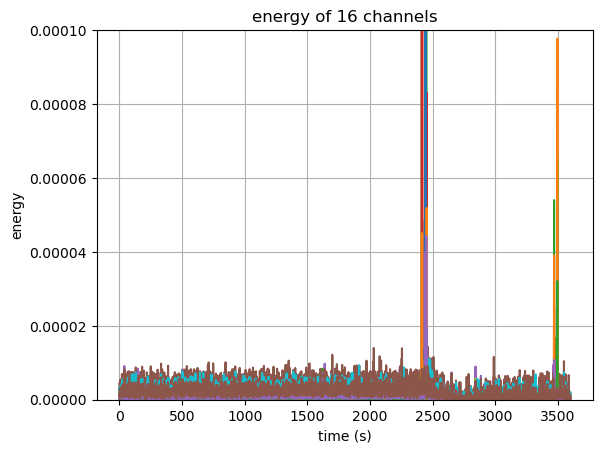

这是file_path: ../src/data/EEG_DATASET/10/10.edf的EEG能量时间趋势图


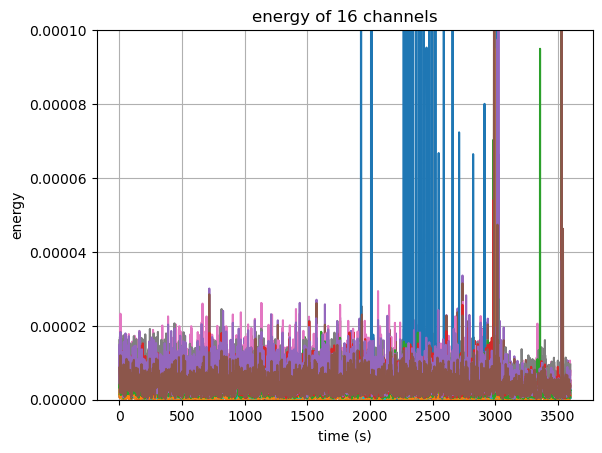

这是file_path: ../src/data/EEG_DATASET/11/11.edf的EEG能量时间趋势图


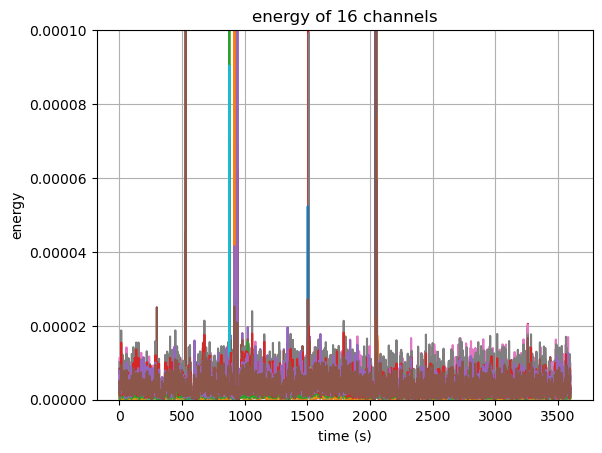

这是file_path: ../src/data/EEG_DATASET/12/12.edf的EEG能量时间趋势图


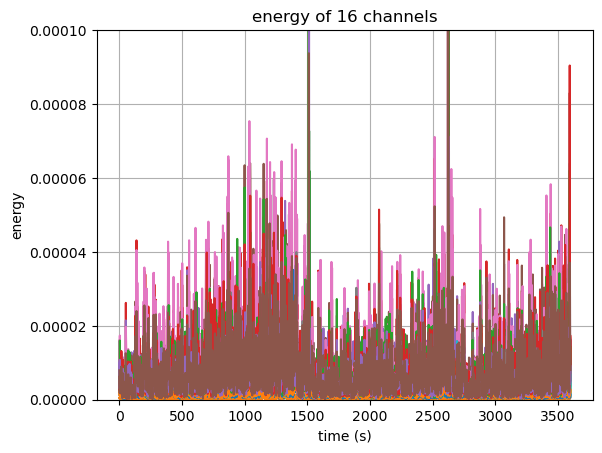

这是file_path: ../src/data/EEG_DATASET/13/13.edf的EEG能量时间趋势图


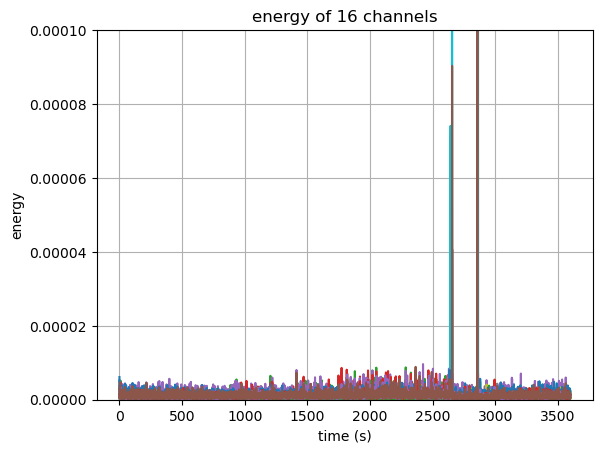

这是file_path: ../src/data/EEG_DATASET/14/14.edf的EEG能量时间趋势图


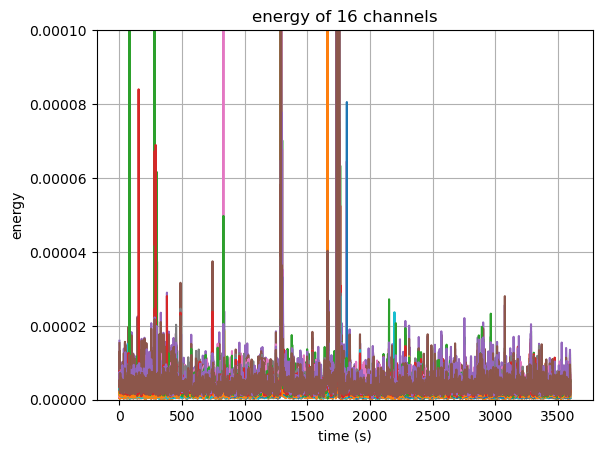

这是file_path: ../src/data/EEG_DATASET/15/15.edf的EEG能量时间趋势图


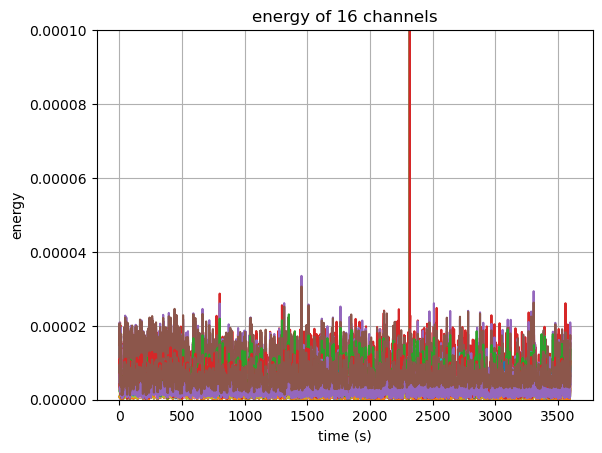

这是file_path: ../src/data/EEG_DATASET/16/16.edf的EEG能量时间趋势图


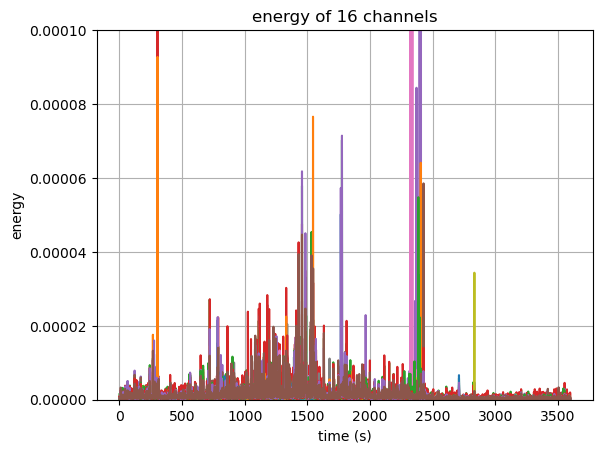

这是file_path: ../src/data/EEG_DATASET/17/17.edf的EEG能量时间趋势图


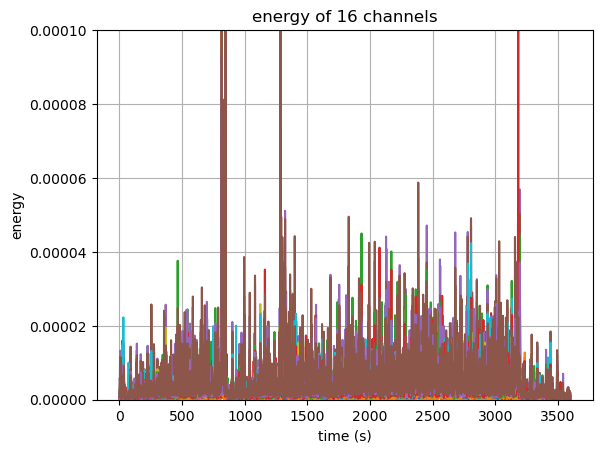

这是file_path: ../src/data/EEG_DATASET/18/18.edf的EEG能量时间趋势图


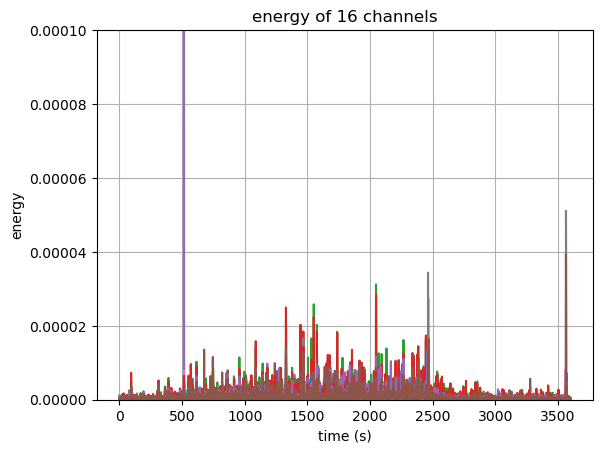

这是file_path: ../src/data/EEG_DATASET/19/19.edf的EEG能量时间趋势图


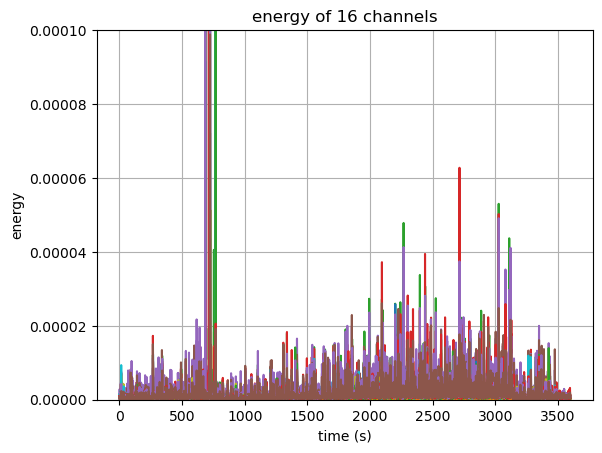

这是file_path: ../src/data/EEG_DATASET/20/20.edf的EEG能量时间趋势图


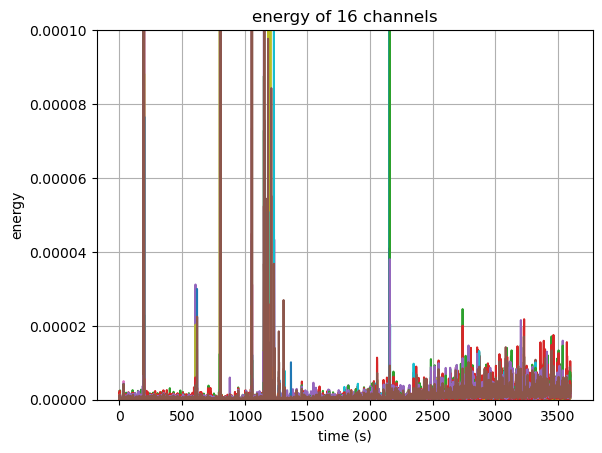

这是file_path: ../src/data/EEG_DATASET/21/21.edf的EEG能量时间趋势图


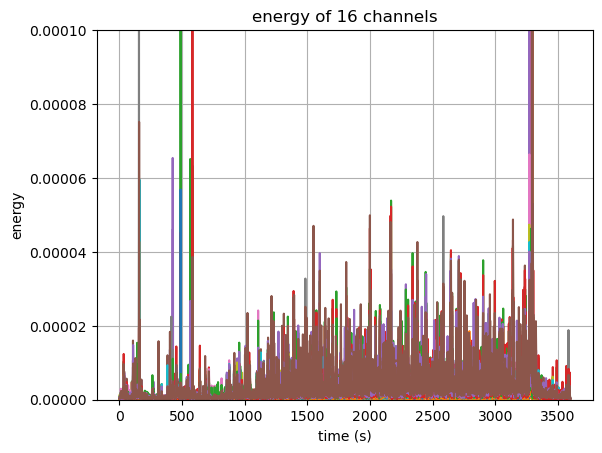

这是file_path: ../src/data/EEG_DATASET/22/22.edf的EEG能量时间趋势图


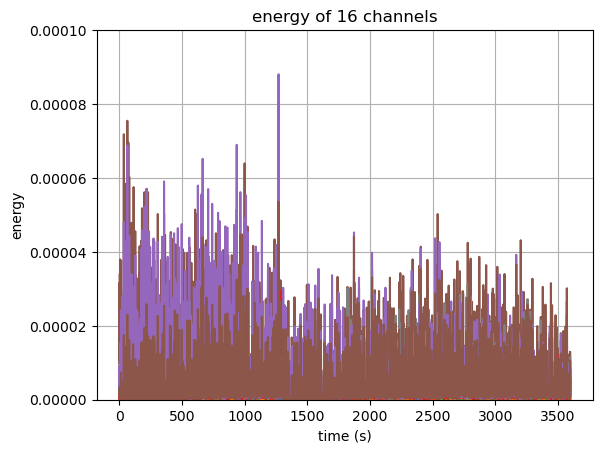

这是file_path: ../src/data/EEG_DATASET/23/23.edf的EEG能量时间趋势图


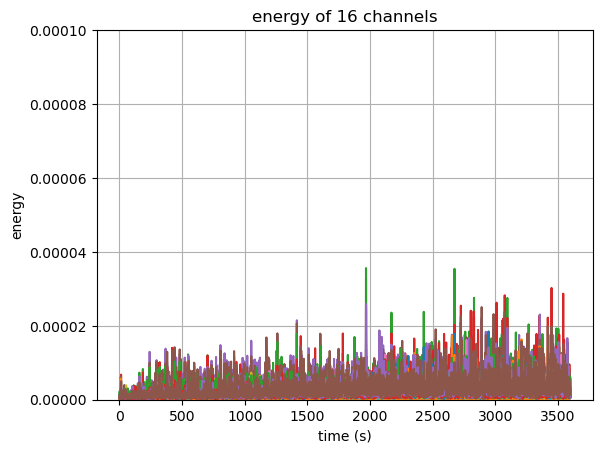

这是file_path: ../src/data/EEG_DATASET/24/24.edf的EEG能量时间趋势图


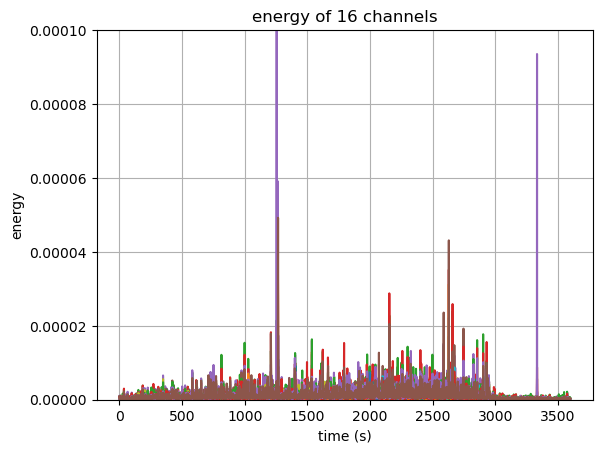

这是file_path: ../src/data/EEG_DATASET/25/25.edf的EEG能量时间趋势图


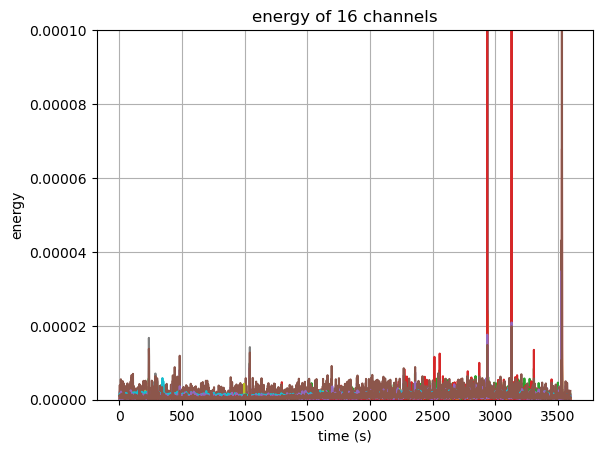

这是file_path: ../src/data/EEG_DATASET/26/26.edf的EEG能量时间趋势图


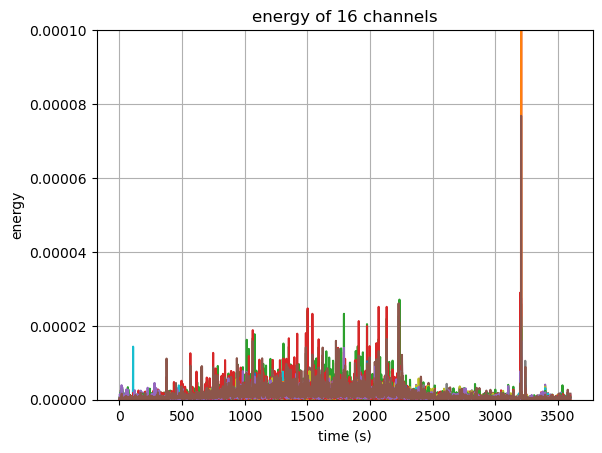

这是file_path: ../src/data/EEG_DATASET/27/27.edf的EEG能量时间趋势图


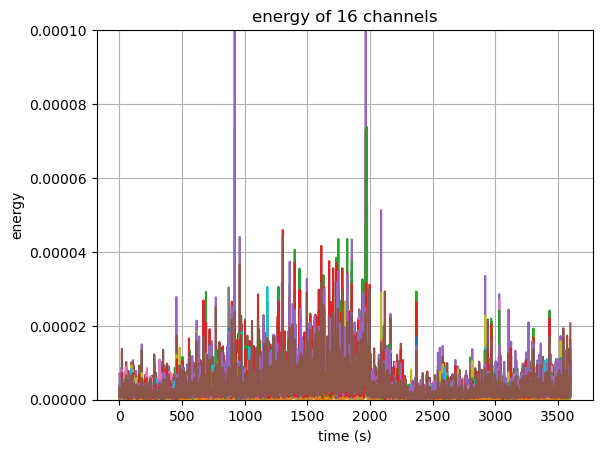

这是file_path: ../src/data/EEG_DATASET/28/28.edf的EEG能量时间趋势图


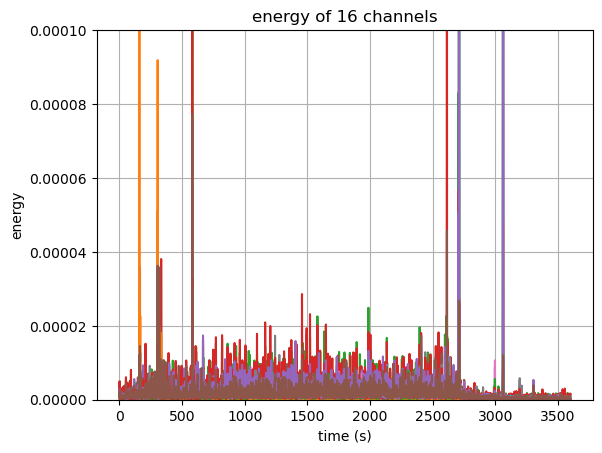

这是file_path: ../src/data/EEG_DATASET/29/29.edf的EEG能量时间趋势图


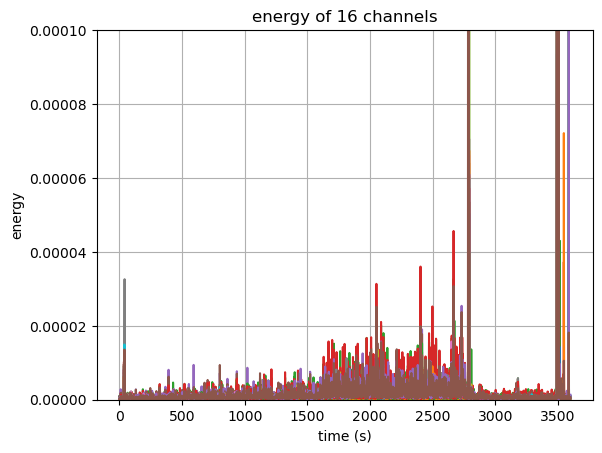

这是file_path: ../src/data/EEG_DATASET/30/30.edf的EEG能量时间趋势图


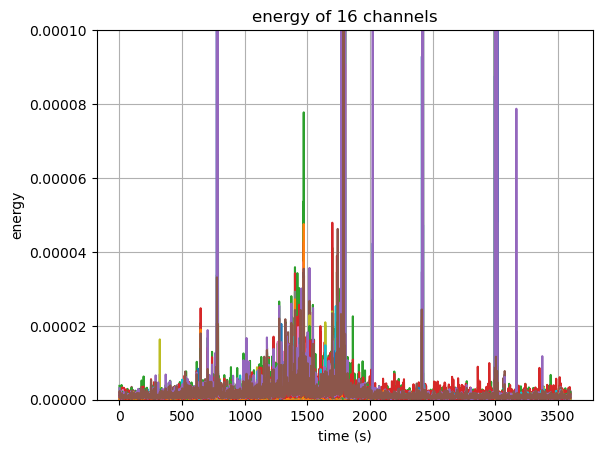

这是file_path: ../src/data/EEG_DATASET/31/31.edf的EEG能量时间趋势图


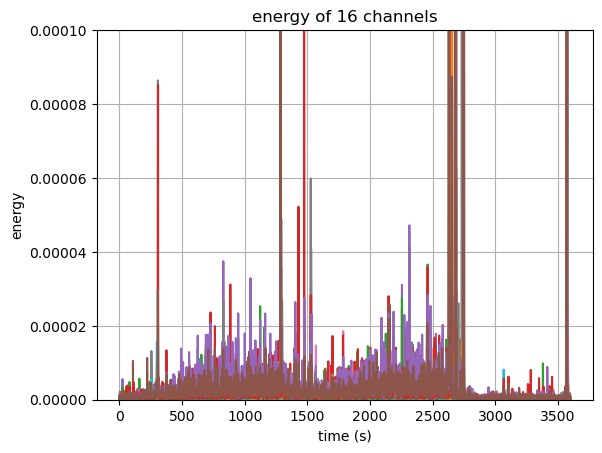

这是file_path: ../src/data/EEG_DATASET/32/32.edf的EEG能量时间趋势图


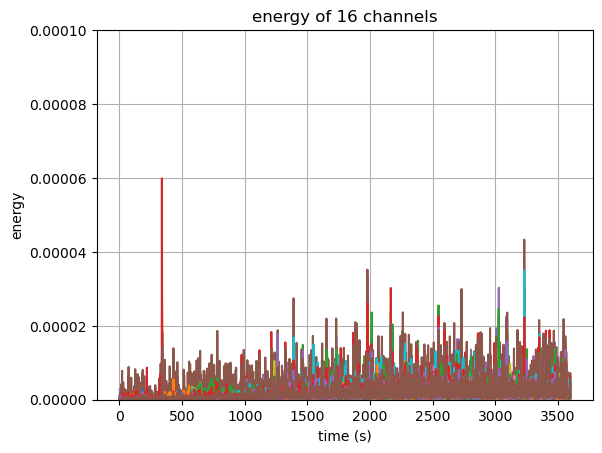

这是file_path: ../src/data/EEG_DATASET/33/33.edf的EEG能量时间趋势图


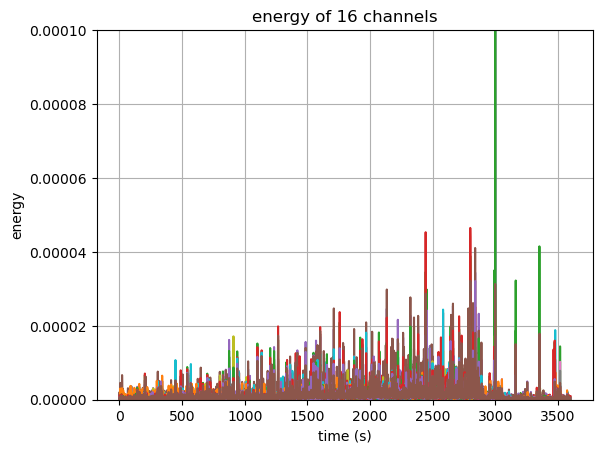

In [3]:
# 绘制33个人的能量图像：

data_box = []
for i in range(1,34):
    file_index = i
    file_path = rf'../src/data/EEG_DATASET/{file_index}/{file_index}.edf'
    data_box.append(utils.visulize_EEG_power(file_path))

    

In [ ]:


# 假设的数据和信息，你需要用你自己的数据和info替换这部分
fake_data = np.eye(16)  # 16个虚拟数据向量

# 创建一个4x4的子图
fig, axes = plt.subplots(4, 4, figsize=(15, 10))  # 调整figsize以适应你的屏幕和需求

# 遍历每个数据向量和对应的子图位置
for i, ax in enumerate(axes.flatten()):
    data = fake_data[i]
    mne.viz.plot_topomap(data, info, axes=ax, show=False, ch_type='eeg', outlines='head', contours=0)
    ax.text(0.5, -0.1, info['ch_names'][i], ha='center', va='top', transform=ax.transAxes)

plt.tight_layout()  # 调整子图间距
plt.show()  # 显示图形


# 创建一个4x4的子图
fig, axes = plt.subplots(4, 4, figsize=(15, 10))  # 调整figsize以适应你的屏幕和需求

# 遍历每个数据向量和对应的子图位置
for i, ax in enumerate(axes.flatten()):
    data = fake_data[i]
    mne.viz.plot_topomap(data, info, axes=ax, show=False, ch_type='eeg', outlines=None, contours=0)
    ax.text(0.5, -0.1, info['ch_names'][i], ha='center', va='top', transform=ax.transAxes)

plt.tight_layout()  # 调整子图间距
plt.show()  # 显示图形


In [ ]:
# file_index = 3
import time 
output_file_name = 'output_image_new'

start_time = time.time()
for file_index in range(11, 34):
        file_path = rf'../src/data/EEG_DATASET/{file_index}/{file_index}.edf'
        raw = utils.obtain_processed_raw(file_path)

        picks = utils.obtain_picks(raw)
        info = utils.obtain_eeg_info(raw, picks)
        utils.obtain_multi_topomap_new(raw, picks, info, output_file_name=output_file_name, eeg_file_name=str(file_index), fig_size=128, vmax=0.00003, is_energy=True, is_test=False)
        del raw, picks, info
        gc.collect()

end_time = time.time()
print(f"Time cost: {end_time - start_time} seconds")

In [ ]:
from PIL import Image
import os

# 文件夹路径
main_path = r'D:\Research\EEG\EEG_DL_Classifier\tests'
eeg_file_name = '1'
folder_path = os.path.join(main_path, eeg_file_name)

output_path = r'D:\Research\EEG\EEG_DL_Classifier\tests\eeg.gif'


# 读取所有图像文件
images = []
for i in range(3600):
    file_name = f'{eeg_file_name}_{i}.png'  # 假设文件命名方式为 "0.png", "1.png", ..., "3599.png"
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        img = Image.open(file_path)
        images.append(img)




In [ ]:
gif_path = output_path
images[0].save(gif_path, save_all=True, append_images=images[0:], optimize=False, duration=100, loop=1)

In [ ]:
egg_filename = '1'
X_train, X_test, y_train, y_test = utils.prepare_data(egg_filename, is_test = False)

### Process data from output_image

In [ ]:
from torchvision import transforms

image_size = 16

eeg_file_name_list = [str(i) for i in range(1,17)]

for eeg_file_name in eeg_file_name_list:
    image_folder = rf'../src/data/output_image/{eeg_file_name}/'
    # 对于images folder里的每一个图片，都要进行如下预处理：1.
    


### Data Distribution

In [ ]:
import pandas as pd


# figure out whether the number of 0 is more than 1 in the label_df
def which_is_more(label_df):
    label_df = label_df['label'].values
    if (sum(label_df == 0) / (sum(label_df == 1)+sum(label_df == 0)) ) > 0.8:
            return 0
    elif (sum(label_df == 1) / (sum(label_df == 1)+sum(label_df == 0)) ) > 0.8:
            return 1

index = 33
normal_index, patient_index = [], []
for i in range(1,index + 1):
    eeg_file_name = str(i)
    with pd.ExcelFile(rf'../src/data/EEG_DATASET/{eeg_file_name}/{eeg_file_name}.xlsx') as xls:
        label_df = pd.read_excel(xls, 'Sheet1',header=None)
        label_df.rename(columns={0: 'label'}, inplace=True)
    
    if which_is_more(label_df) == 0:
        normal_index.append(i)
    else:
        patient_index.append(i)


print(f'病人: {patient_index}')
print(f'正常人: {normal_index}')

       


### Model Trainning

In [ ]:
eeg_file_names = ['1','16']
X_train, X_test, y_train, y_test = utils.prepare_data_from_multi_file(eeg_file_names, handle_data_imbalance=False, is_test = False)

In [ ]:
train_svm_model(X_train, y_train, X_test, y_test)

In [ ]:
import torch
import pytorch_lightning as pl
import sys
sys.path.append('../src/data')
from data import EEG_Dataset, EEG_DataModule

def test_eeg_data_module():
    eeg_file_names = ['1']  # 指定 EEG 文件名列表

    # 初始化数据模块
    data_module = EEG_DataModule(eeg_file_names=eeg_file_names, test_mode = True, batch_size=2)  # 您可以调整 batch_size

    # 获取数据加载器
    train_loader = data_module.train_dataloader()
    val_loader = data_module.val_dataloader()
    test_loader = data_module.test_dataloader()

    # 遍历训练数据加载器进行测试
    for batch in train_loader:
        images, labels = batch
        print("Train batch - Images shape:", images.shape, "Labels shape:", labels.shape)
        break  # 只查看第一个 batch

    # 同样，您可以遍历验证和测试数据加载器
    for batch in val_loader:
        images, labels = batch
        print("Validation batch - Images shape:", images.shape, "Labels shape:", labels.shape)
        break

    for batch in test_loader:
        images, labels = batch
        print("Test batch - Images shape:", images.shape, "Labels shape:", labels.shape)
        break

# 运行测试函数
test_eeg_data_module()
